In [1]:
from sklearn.datasets import load_wine
wines=load_wine()
dir(wines)

['DESCR', 'data', 'feature_names', 'frame', 'target', 'target_names']

In [2]:
wines.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [3]:
wines.target_names


array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [4]:
import pandas as pd
df=pd.DataFrame(wines.data,columns=wines.feature_names)

In [5]:
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [6]:
df['target']=wines.target

In [7]:
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [8]:
from sklearn.cluster import KMeans
km=KMeans()

In [9]:
df.columns.isna()

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False])

In [10]:
df0=df[df['target']==0]
df1=df[df['target']==1]
df2=df[df['target']==2]

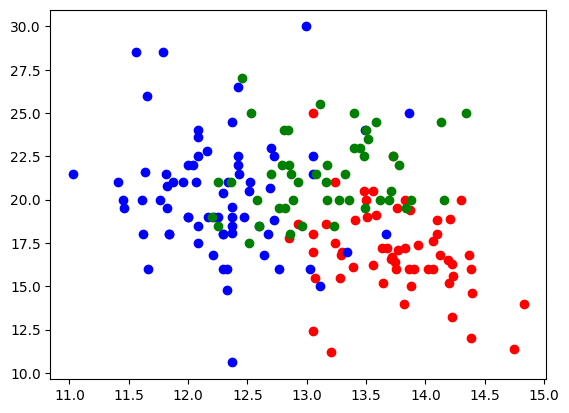

In [11]:
import matplotlib.pyplot as plt
plt.scatter(df0['alcohol'],df0['alcalinity_of_ash'],color='red')
plt.scatter(df1['alcohol'],df1['alcalinity_of_ash'],color='blue')
plt.scatter(df2['alcohol'],df2['alcalinity_of_ash'],color='green')

In [12]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df.drop('target',axis='columns'),wines.target,test_size=0.2)

In [13]:
from sklearn.naive_bayes import MultinomialNB
mb=MultinomialNB()
mb.fit(X_train,y_train)

MultinomialNB()

In [14]:
mb.score(X_test,y_test)

0.8611111111111112

In [15]:
from sklearn.naive_bayes import GaussianNB
gb=GaussianNB()

In [16]:
gb.fit(X_train,y_train)
gb.score(X_test,y_test)

0.9444444444444444

In [17]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=30)
model.fit(X_train,y_train)

RandomForestClassifier(n_estimators=30)

In [21]:
model.score(X_train,y_train)

1.0

In [19]:
from sklearn.model_selection import cross_val_score
cv=cross_val_score(model,X_test,y_test,cv=5)

In [20]:
cv

array([0.875     , 1.        , 1.        , 0.85714286, 1.        ])